# 1. Data Loading and Visualization

In [96]:
#讀入套件
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#企業
#Delta Air Lines Inc. (DAL)
#American Airlines Group Inc. (AAL)
#United Airlines Holdings Inc. (UAL)
#Southwest Airlines Co. (LUV)

company_list = ['DAL', 'AAL', 'UAL', 'LUV']
company_name = ['Delta', 'American', 'United', 'Southwest']
company_Data = ['', '', '', '']

RawData = pd.read_csv('Dataset/eod_prices_history.csv')
#RawData = RawData.iloc[0:7]

for i in range(4):
    fliter = (RawData["ticker"] == company_list[i])
    company_Data[i] = RawData[fliter]
    company_Data[i]['date'] = pd.to_datetime(company_Data[i]['date'])
    

<ipython-input-97-8170c73539e3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_Data[i]['date'] = pd.to_datetime(company_Data[i]['date'])


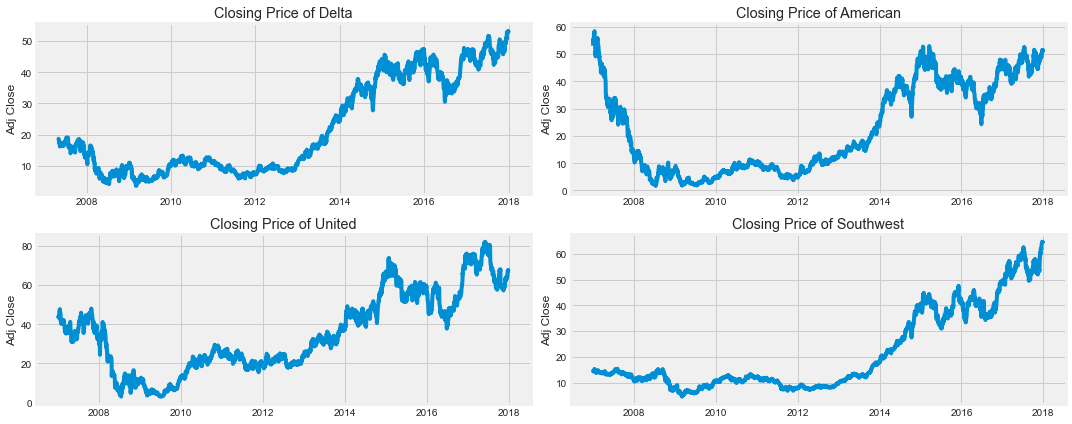

In [98]:
#Closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(company_Data[i]['date'],company_Data[i]['adj_close'])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i]}")
    
plt.tight_layout()

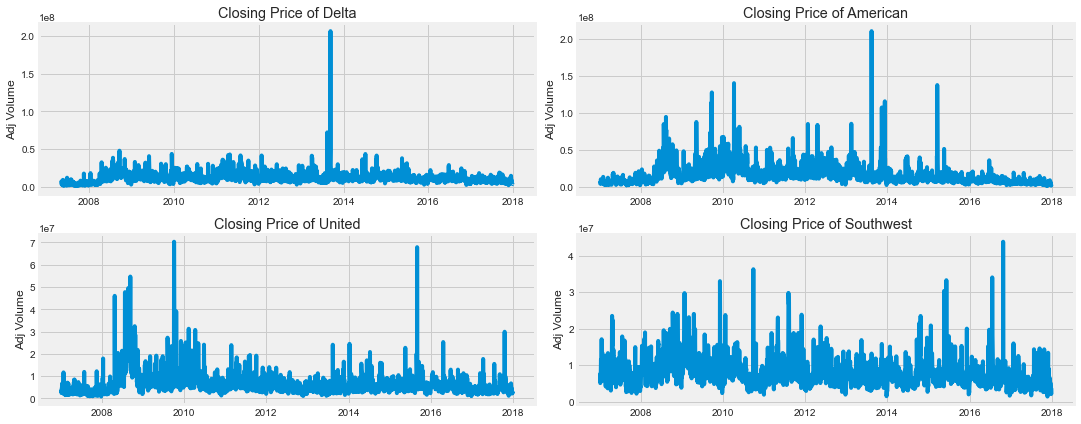

In [99]:
#Total Volume
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(company_Data[i]['date'],company_Data[i]['adj_volume'])
    plt.ylabel('Adj Volume')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i]}")
    
plt.tight_layout()

# 2. Compute moving average

In [100]:
ma_day = [10, 30, 90]

for ma in ma_day:
    for i in range(4):
        column_name = f"MA for {ma} days"
        company_Data[i][column_name] = company_Data[i]['adj_close'].rolling(ma).mean()
        

<ipython-input-100-bc1971292fc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_Data[i][column_name] = company_Data[i]['adj_close'].rolling(ma).mean()


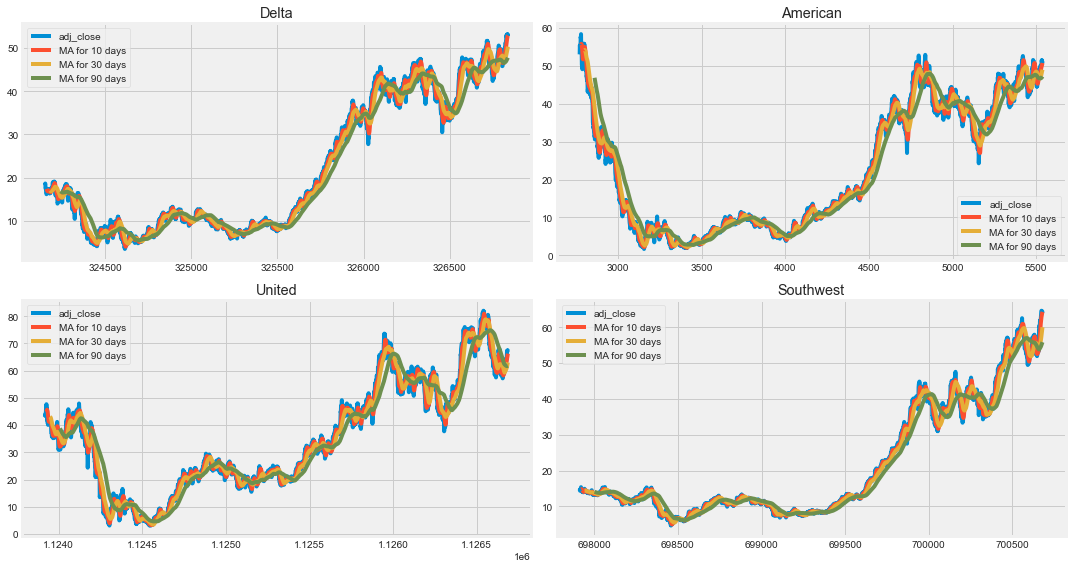

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

company_Data[0][['adj_close', 'MA for 10 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[0,0])
axes[0,0].set_title(company_name[0])

company_Data[1][['adj_close', 'MA for 10 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[0,1])
axes[0,1].set_title(company_name[1])

company_Data[2][['adj_close', 'MA for 10 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[1,0])
axes[1,0].set_title(company_name[2])

company_Data[3][['adj_close', 'MA for 10 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[1,1])
axes[1,1].set_title(company_name[3])

fig.tight_layout()


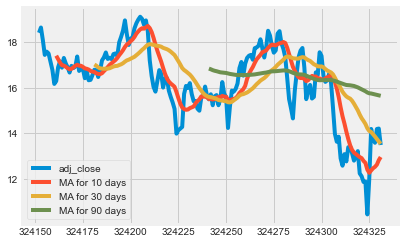

In [107]:
company_Data[0].head(180)[['adj_close', 'MA for 10 days', 'MA for 30 days', 'MA for 90 days']].plot()
fig.tight_layout()

# 3. Compute Daily Return

<ipython-input-86-a0eeada08380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_Data[i]['Daily Return'] = company_Data[i]['adj_close'].pct_change()


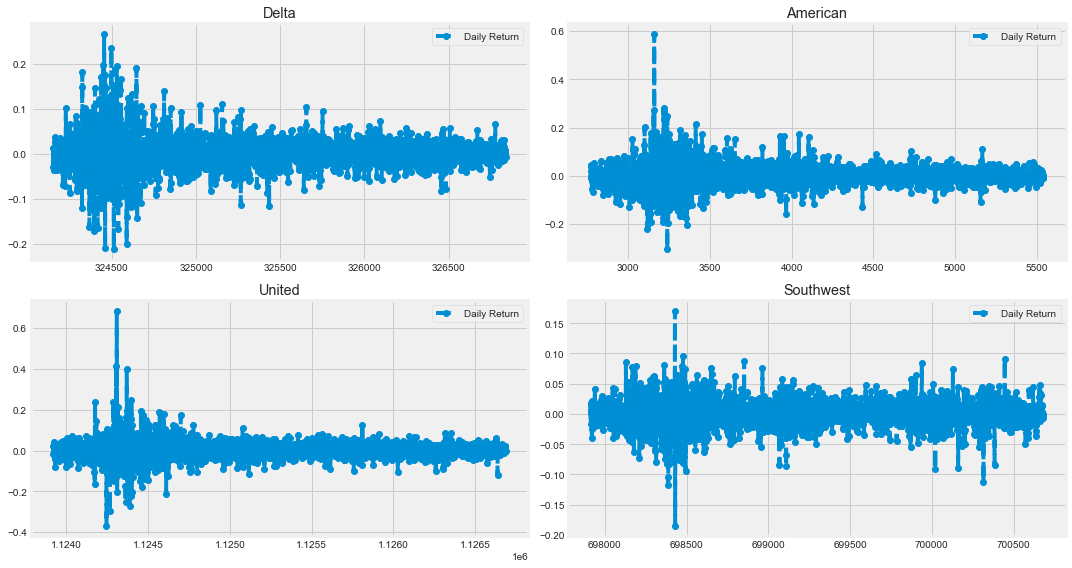

In [86]:
for i in range(4):
    company_Data[i]['Daily Return'] = company_Data[i]['adj_close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

company_Data[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(company_name[0])

company_Data[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(company_name[1])

company_Data[2]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(company_name[2])

company_Data[3]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(company_name[3])

fig.tight_layout()

C:\Users\user\anaconda3\envs\Keras\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\Keras\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\Keras\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

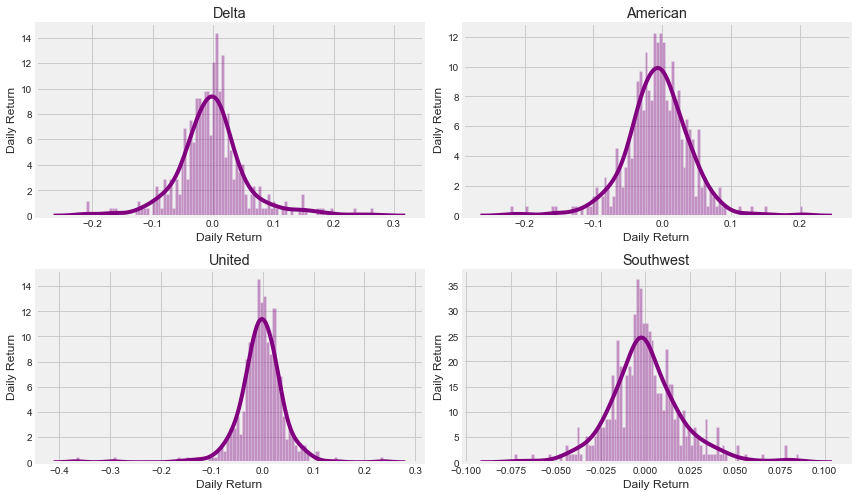

In [92]:
plt.figure(figsize=(12, 7))

for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.distplot(company_Data[i]['Daily Return'].head(365).dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# 4. Compute Correlation 

In [9]:
for i in range(4):
    closing_df = pd.DataFrame()
    closing_df['date'] = company_Data[i]['date']
    closing_df['adj_close'] = company_Data[i]['adj_close']
    closing_df
    closing_df.to_csv(f"Dataset/Company/{company_list[i]}.csv",index=False,sep=',')


In [10]:
AAL = pd.read_csv('Dataset/Company/AAL.csv')
DAL = pd.read_csv('Dataset/Company/DAL.csv')
LUV = pd.read_csv('Dataset/Company/LUV.csv')
UAL = pd.read_csv('Dataset/Company/UAL.csv')

closing_df = pd.read_csv('Dataset/Company/ALL_CLOSE.csv')

closing_df['date'] = pd.to_datetime(closing_df['date'])
closing_df['DAL'] = closing_df['DAL'].astype(float, errors = 'raise')
closing_df['AAL'] = closing_df['AAL'].astype(float, errors = 'raise')
closing_df['UAL'] = closing_df['UAL'].astype(float, errors = 'raise')
closing_df['LUV'] = closing_df['LUV'].astype(float, errors = 'raise')

In [11]:
closing_df.set_index('date', inplace=True)
closing_df.head()

,DAL,AAL,UAL,LUV
date,,,,
2007-05-03,18.409118,33.509130,31.247654,13.467229
2007-05-04,18.640121,34.074685,33.129033,13.625012
2007-05-07,18.089269,33.094390,33.035895,13.689981
2007-05-08,17.440685,32.425150,33.324622,13.634293
2007-05-09,17.582840,32.368595,32.830993,13.495073


In [12]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,DAL,AAL,UAL,LUV
date,,,,
2007-05-03,NaN,NaN,NaN,NaN
2007-05-04,0.012548,0.016878,0.060209,0.011716
2007-05-07,-0.029552,-0.028769,-0.002811,0.004768
2007-05-08,-0.035855,-0.020222,0.008740,-0.004068
2007-05-09,0.008151,-0.001744,-0.014813,-0.010211


C:\Users\user\anaconda3\envs\Keras\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


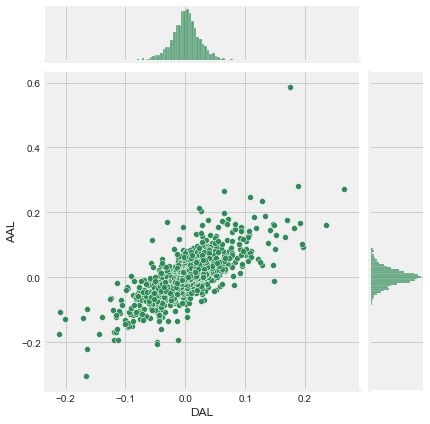

In [13]:
sns.jointplot('DAL', 'AAL', tech_rets, kind='scatter', color='seagreen')

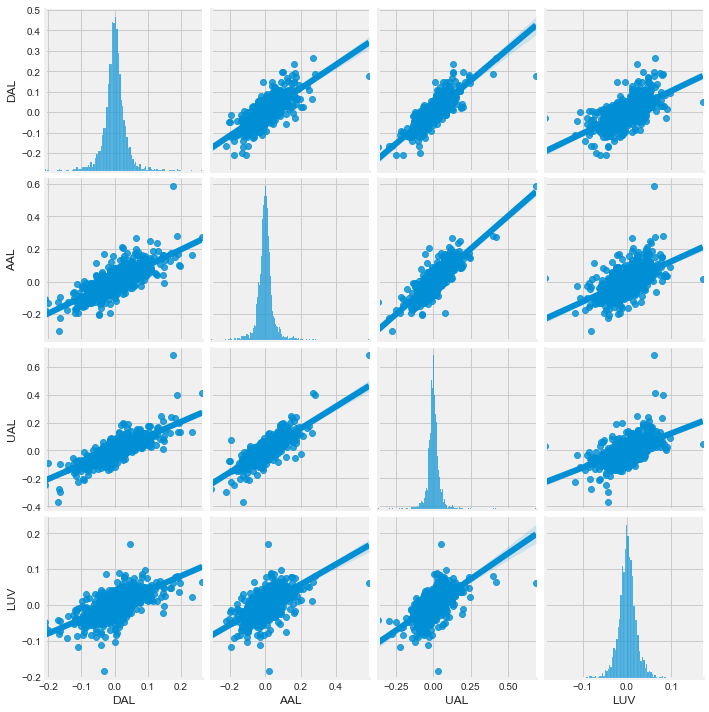

In [14]:
sns.pairplot(tech_rets, kind='reg')

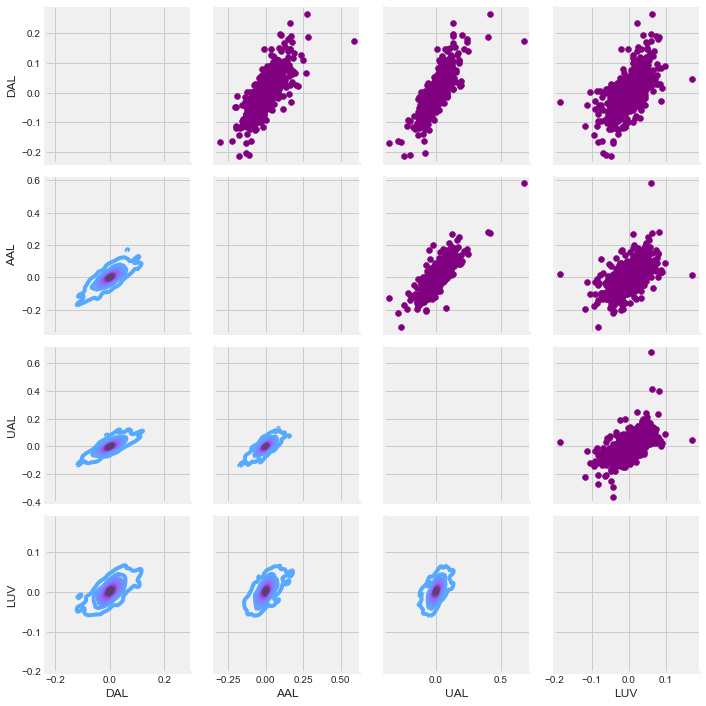

In [15]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

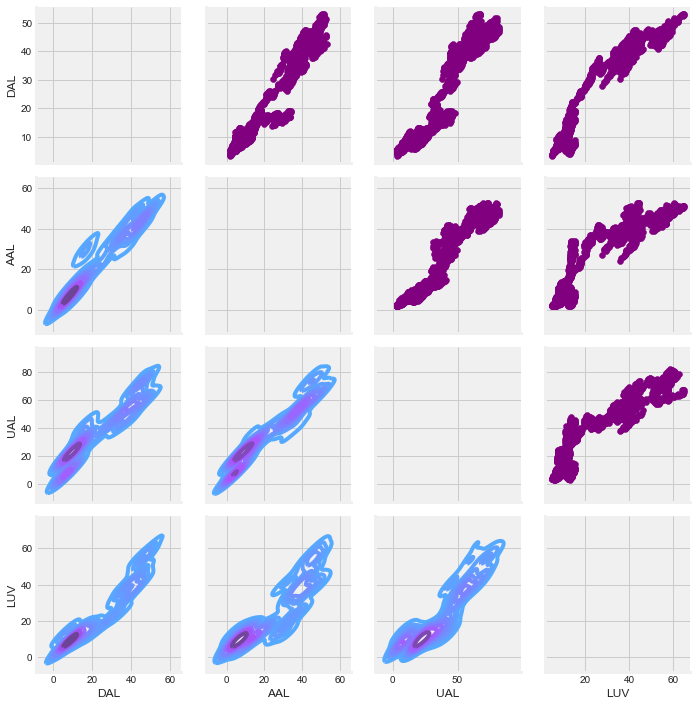

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

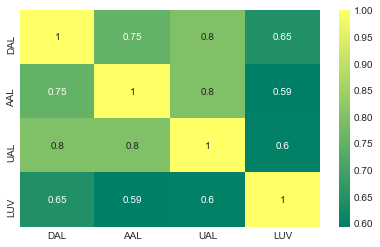

In [17]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

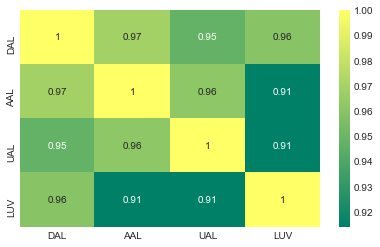

In [18]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# 4.1 

In [50]:
Others_df = pd.read_csv('Dataset/Company/DAL_CLOSE.csv')
Others_df['date'] = pd.to_datetime(Others_df['date'])
Others_df.set_index('date', inplace=True)

In [54]:
Others_df

,DAL,Tbound,MSCI,CBOE
date,,,,
2007-05-03,18.409118,4.682,24.97,13.09
2007-05-04,18.640121,4.644,24.97,12.91
2007-05-07,18.089269,4.632,24.97,13.15
2007-05-08,17.440685,4.638,24.97,13.21
2007-05-09,17.582840,4.672,24.97,12.88
...,...,...,...,...
2017-12-22,52.847968,2.412,128.33,9.90
2017-12-26,53.225251,2.405,125.60,10.25
2017-12-27,52.932856,2.474,125.47,10.47


In [56]:
DAL_rets = Others_df.pct_change()
DAL_rets.head()

,DAL,Tbound,MSCI,CBOE
date,,,,
2007-05-03,NaN,NaN,NaN,NaN
2007-05-04,0.012548,-0.008116,0.0,-0.013751
2007-05-07,-0.029552,-0.002584,0.0,0.018590
2007-05-08,-0.035855,0.001295,0.0,0.004563
2007-05-09,0.008151,0.007331,0.0,-0.024981


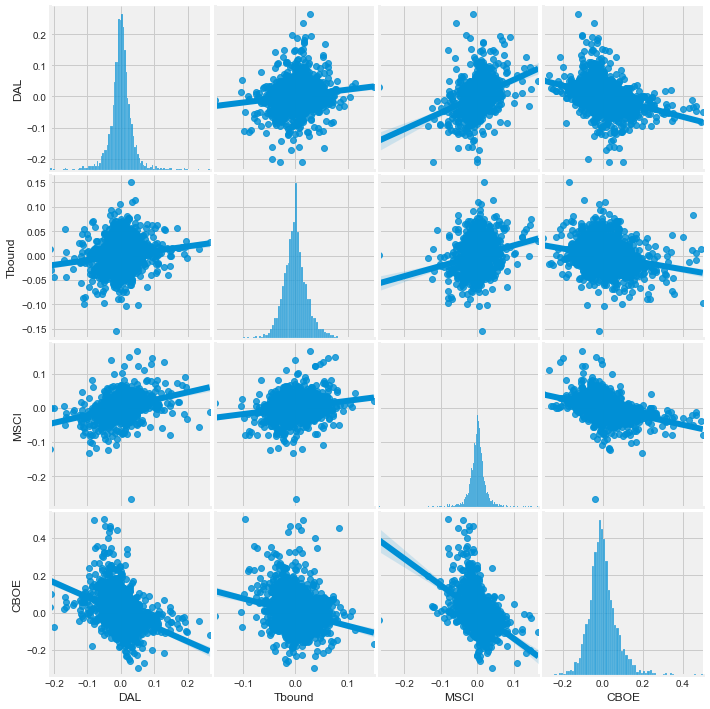

In [58]:
sns.pairplot(DAL_rets, kind='reg')

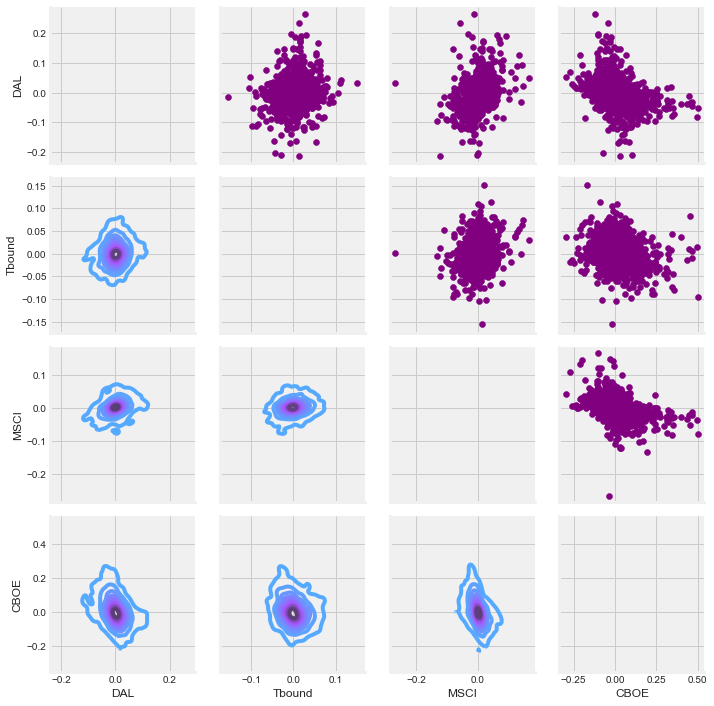

In [60]:
return_fig = sns.PairGrid(DAL_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

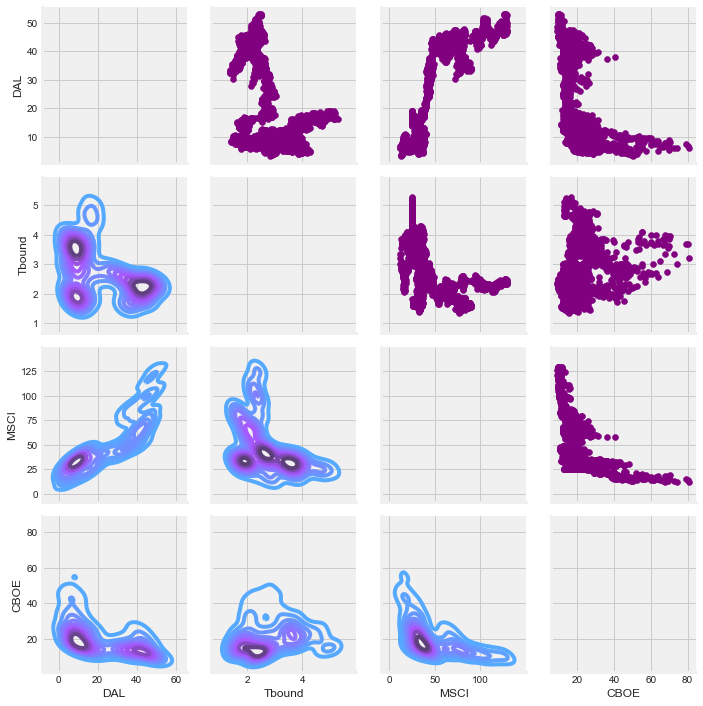

In [61]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(Others_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

# 5.0 Risk

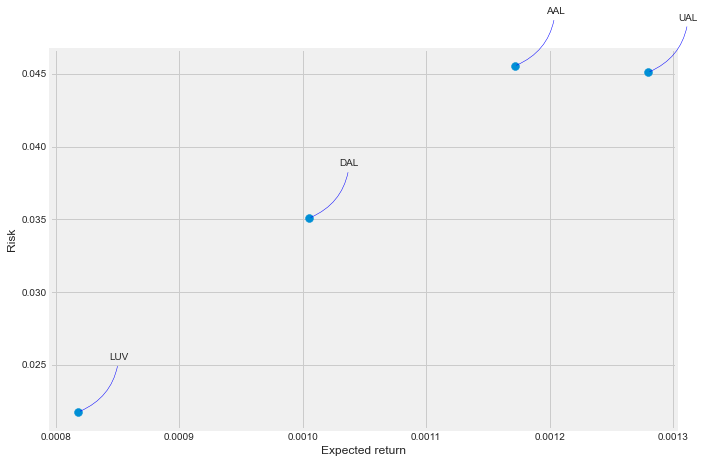

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [108]:
rets.mean()/rets.std()

DAL    0.028654
AAL    0.025732
UAL    0.028376
LUV    0.037613
dtype: float64

# 6.0 Predicting the closing price

In [298]:
DAL = ""
DAL = company_Data[3]
DAL.set_index('date', inplace=True)
DAL.head()

KeyError: "None of ['date'] are in the columns"

In [299]:
data = DAL.filter(['adj_close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2631

In [300]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16236858],
       [0.16608244],
       [0.16205909],
       ...,
       [0.99787996],
       [0.99641224],
       [0.98956289]])

In [301]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.16236858, 0.16608244, 0.16205909, 0.16639192, 0.16685616,
       0.17057002, 0.17211746, 0.17320067, 0.17861671, 0.16824885,
       0.16732039, 0.1684036 , 0.16221383, 0.16004741, 0.15880946,
       0.15633355, 0.15555983, 0.1564883 , 0.1564883 , 0.15586932,
       0.15973792, 0.15834523, 0.15478611, 0.15757151, 0.15633355,
       0.15679778, 0.15664304, 0.16623718, 0.16670141, 0.17118899,
       0.16608244, 0.16515397, 0.16422551, 0.16376127, 0.16376127,
       0.16051164, 0.15958318, 0.15593895, 0.15624854, 0.15965392,
       0.15748686, 0.15578416, 0.155165  , 0.1536171 , 0.15671291,
       0.15547458, 0.15531979, 0.15098566, 0.15253357, 0.15284315,
       0.15439105, 0.15439105, 0.15624854, 0.1584156 , 0.15408147,
       0.15439105, 0.15253357, 0.15222399, 0.14959255, 0.14866381])]
[0.14974734257035868]

[array([0.16236858, 0.16608244, 0.16205909, 0.16639192, 0.16685616,
       0.17057002, 0.17211746, 0.17320067, 0.17861671, 0.16824885,
       0.16732039, 0.1684036 , 0.16

In [302]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2571/2571 [==============================] - 25s 10ms/step - loss: 0.0014


In [262]:
def TEST():
    test_data = scaled_data[training_data_len - 60: , :]

    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print("MSE:",rmse)

    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions

    plt.figure(figsize=(16,6))
    plt.title('LSTM Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Vol', fontsize=18)
    plt.plot(train['adj_close'])
    plt.plot(valid[['adj_close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

DAL: 
MSE: 0.9503360672450029


<ipython-input-262-5e1405edfb9f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


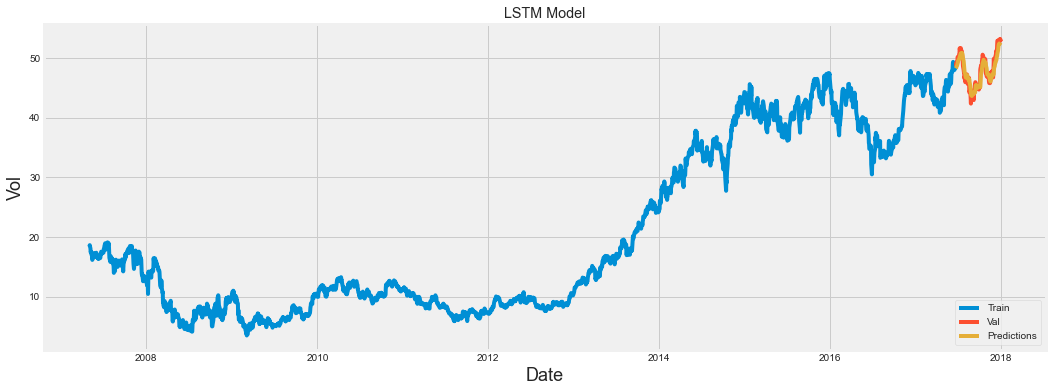

In [263]:
print("DAL: ")
TEST()
model.save("DAL.h5")

AAL: 
MSE: 0.8315627376363283


<ipython-input-262-5e1405edfb9f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


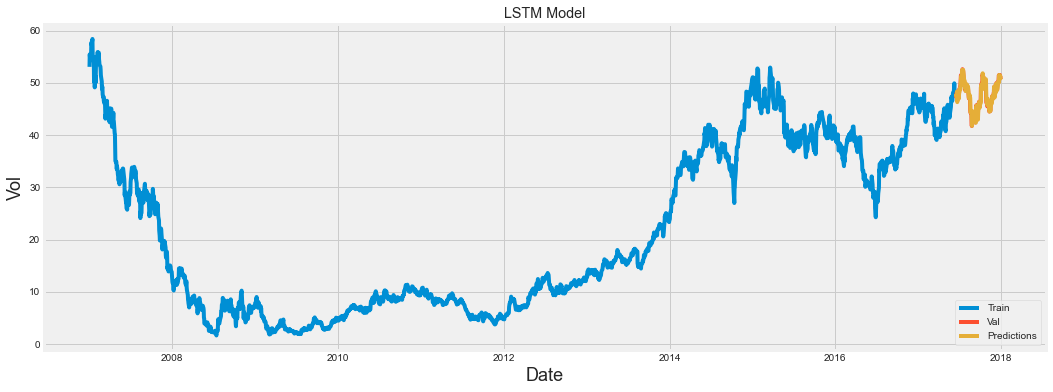

In [277]:
print("AAL: ")
TEST()
model.save("AAL.h5")

UAL: 
MSE: 1.3067107891589171


<ipython-input-262-5e1405edfb9f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


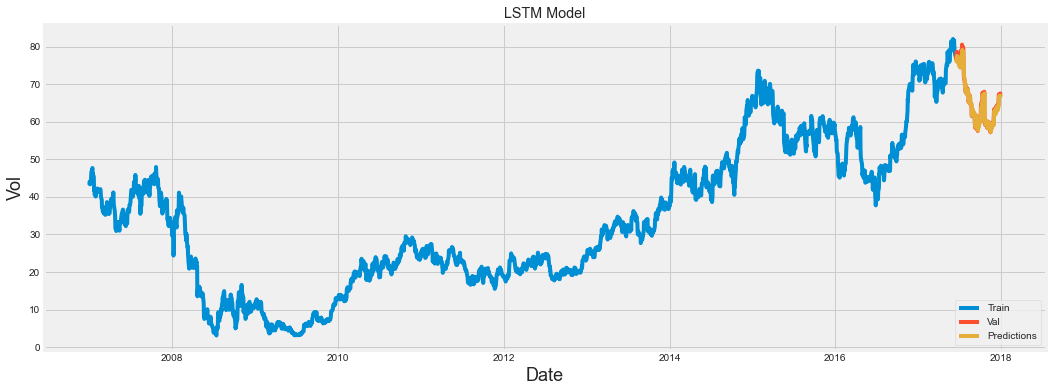

In [297]:
print("UAL: ")
TEST()
model.save("UAL.h5")

LUV: 
MSE: 1.1493027495652997


<ipython-input-262-5e1405edfb9f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


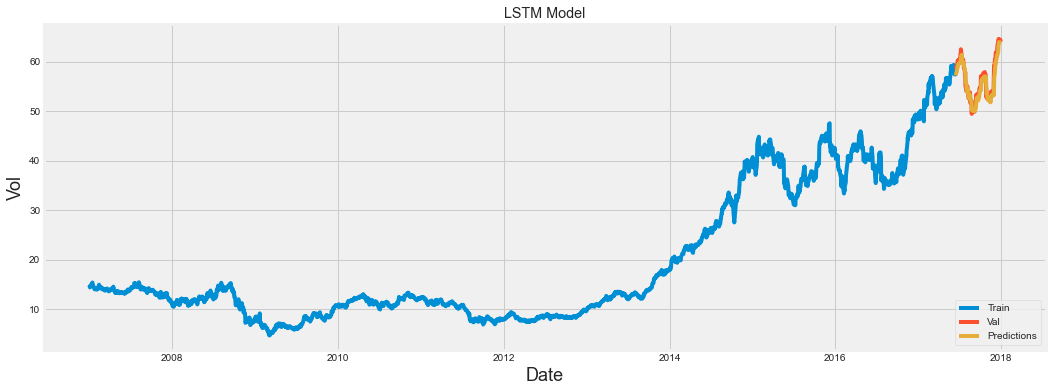

In [308]:
print("LUV: ")
model = keras.models.load_model("LUV.h5")
TEST()
#model.save("LUV.h5")